# Background:

The dataset comprises of the complete figure of the  customer profile on basis of the purchase of the different products from a retail store Cardio Good Fitness.

# Objective:

Aim to explore the dataset to identify differences between customers for each product available in the retail store .

# Data:

In [ ]:
The data is for customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables

Product - the model no. of the treadmill
Age - in no of years, of the customer
Gender - of the customer
Education - in no. of years, of the customer
Marital Status - of the customer
Usage - Avg. # times the customer wants to use the treadmill every week
Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
Income - of the customer
Miles- expected to run

# Import the necessary libraries :

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Read the dataset: 

In [96]:
cardiodata = pd.read_csv('CardioGoodFitness.csv')
df = cardiodata.copy()

# View the first few rows of the dataset :

In [4]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


Observations :
* The Fitness talks about Self-rated fitness score of the customers .
*  Product, Gender and Marital Status are the categorical variables of the dataset.
* Product column defines the types of threadmills used by different customers.

# Check shape of dataset :

In [6]:
df.shape

(180, 9)

* There are total of 180 rows and 9 columns in the dataset.

# Check the dataframe info :

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


Observations :
* All the columns have 180 observations indicating that there are no missing values in the dataset . 
*  Product, Gender and Marital Status should the categorical variables of the dataset which needs to be converted from objects.
* There are 6 numerical variables in  the dataset.

# Data Preprocessing :

Fixing the datatypes: 

In [10]:
df['Product'] = df.Product.astype('category')
df['Gender'] = df.Gender.astype('category')
df['MaritalStatus'] = df.MaritalStatus.astype('category')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.4 KB


 * data type of all the columns have been fixed.

In [14]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product,180,3,TM195,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,180,NaN,NaN,NaN,28.7889,6.9435,18,24,26,33,50
Gender,180,2,Male,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,180,NaN,NaN,NaN,15.5722,1.61705,12,14,16,16,21
MaritalStatus,180,2,Partnered,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usage,180,NaN,NaN,NaN,3.45556,1.0848,2,3,3,4,7
Fitness,180,NaN,NaN,NaN,3.31111,0.958869,1,3,3,4,5
Income,180,NaN,NaN,NaN,53719.6,16506.7,29562,44058.8,50596.5,58668,104581
Miles,180,NaN,NaN,NaN,103.194,51.8636,21,66,94,114.75,360


Missing values check:

In [18]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

* From the above check for missing values , there are no missing values in the dataset.

# EDA :

# Univariate Analysis of Numerical variables on Histogram boxplots:

In [19]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

# Observations on Age:

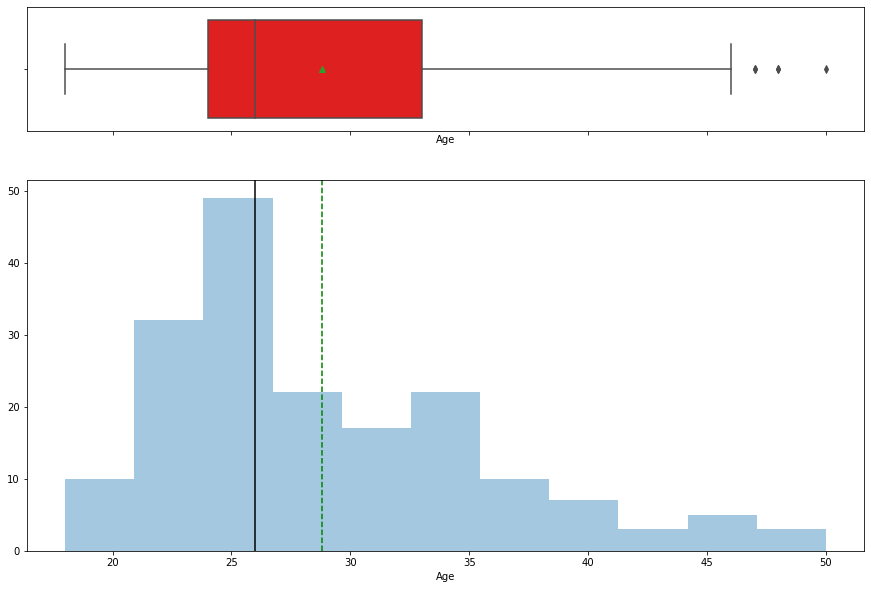

In [20]:
histogram_boxplot(df.Age)

Observations: 
* Based on the above plot, the Age is rightly skewed.
* Mean is near to 30 whereas Median above 25 .
 * There are very few outliers.


# Observations on Education:

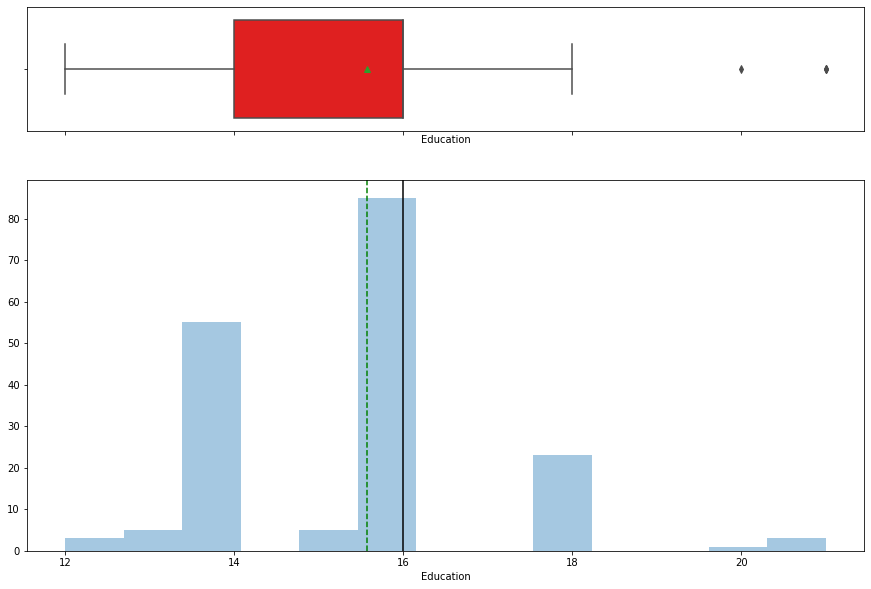

In [21]:
histogram_boxplot(df.Education)

# Observations on Usage:

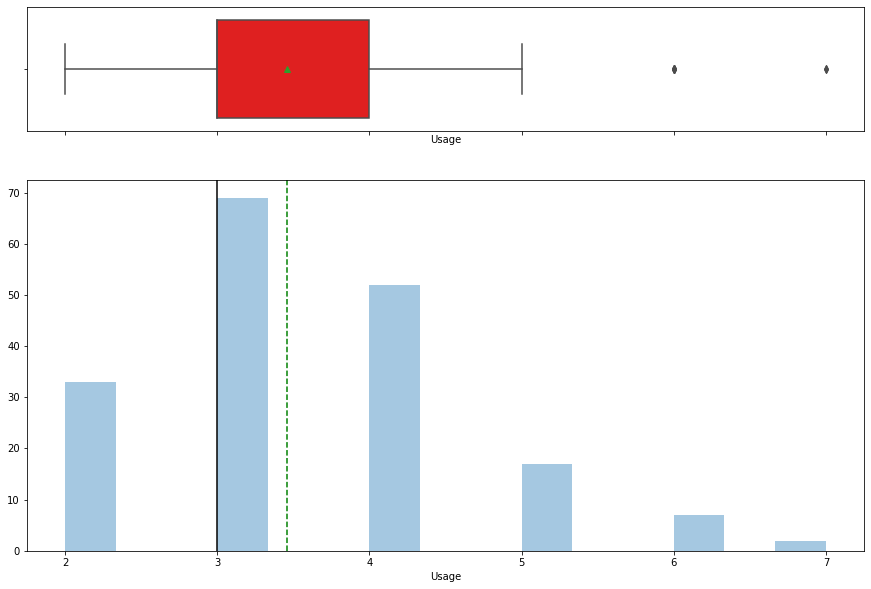

In [22]:
histogram_boxplot(df.Usage)

Observations: Both the Usage and Education are rightly skewed with fewer outliers. 

# Observations on Fitness:

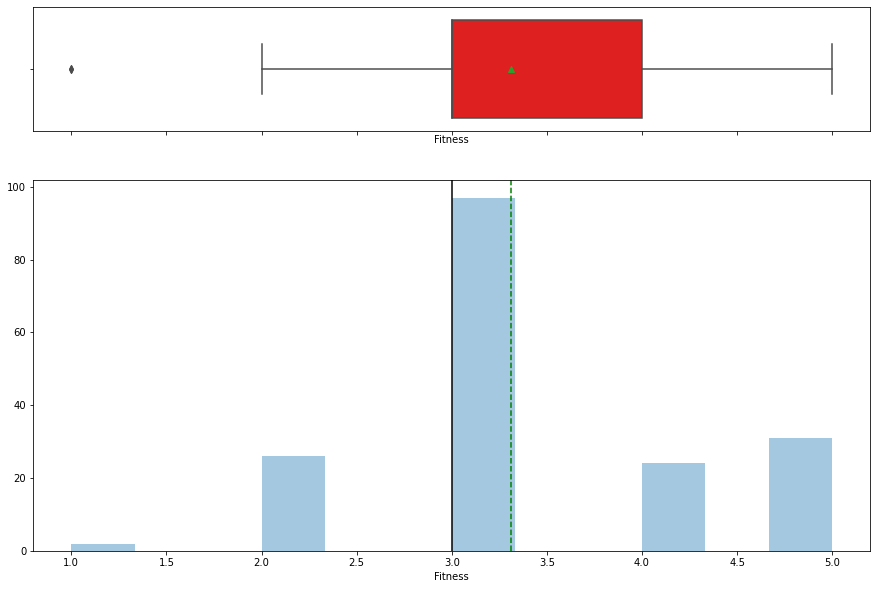

In [23]:
histogram_boxplot(df.Fitness)

Observations: The Fitness is left skewed.  The median and mean is closer to 3.0 to 3.5 .

# Observations on Income:

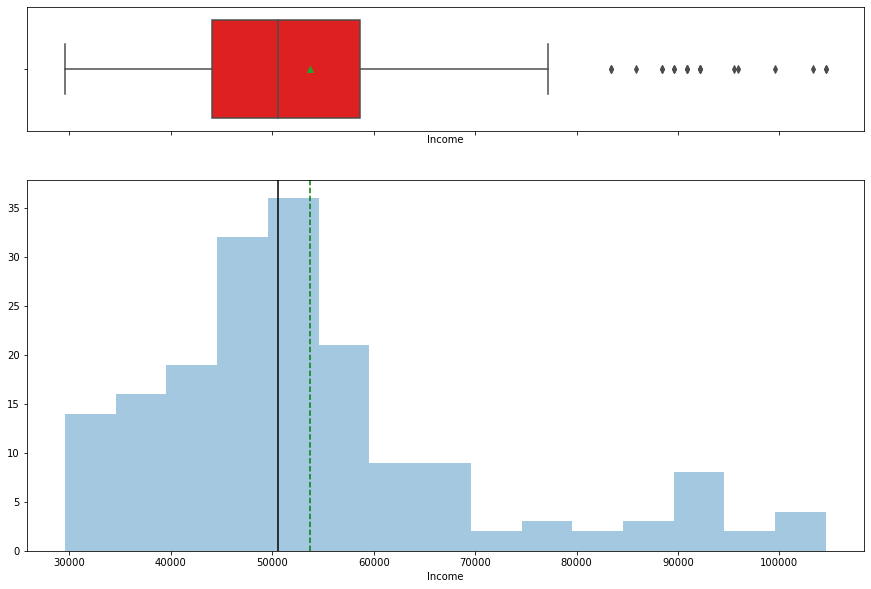

In [24]:
histogram_boxplot(df.Income)

Observations: Income has more outliers highly skewed towards right .

# Observations on Miles:

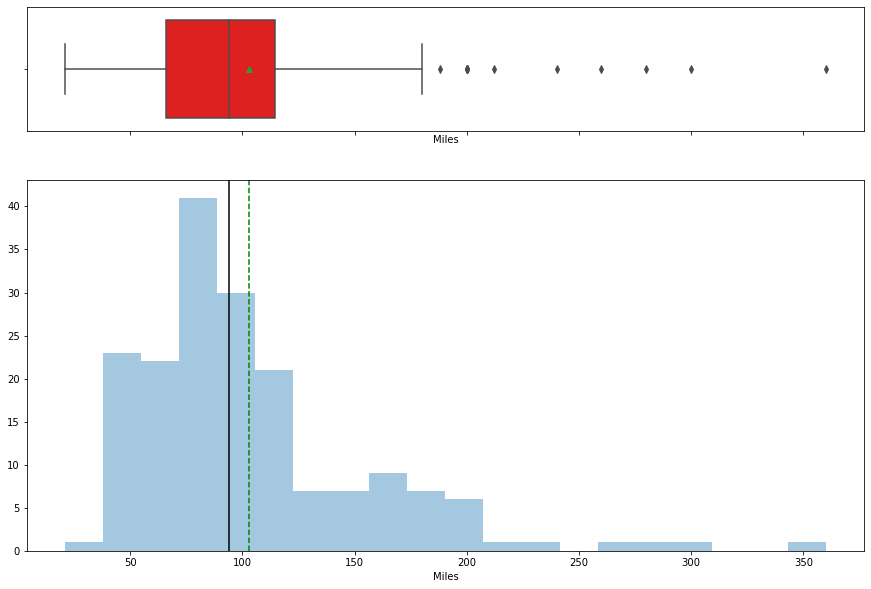

In [25]:
histogram_boxplot(df.Miles)

Observations: Miles has more outliers skewed towards right with more outliers.

# Univariate Analysis of Categorical variables:

In [26]:
# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage


# Observations on Gender:

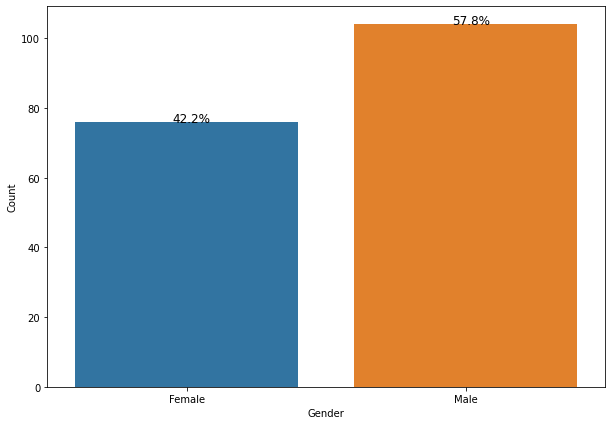

In [27]:
plt.figure(figsize=(10,7))
ax = sns.countplot(df['Gender'])
plt.xlabel('Gender')
plt.ylabel('Count')
bar_perc(ax,df['Gender'])

57.8% of the customers are Male who are into usinng threadmills in Cardio Fitness whereas females are 42.2%.

# Observations on MaritalStatus:

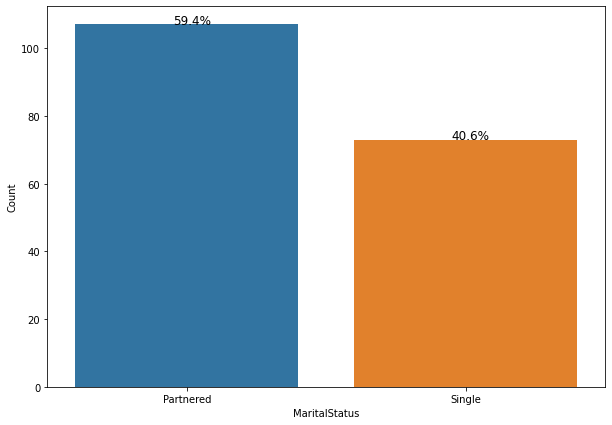

In [28]:
plt.figure(figsize=(10,7))
ax = sns.countplot(df['MaritalStatus'])
plt.xlabel('MaritalStatus')
plt.ylabel('Count')
bar_perc(ax,df['MaritalStatus'])

Observations: The percentage of customers who are partnered goes for cardio than the customers who are single .

# Observations on Product:

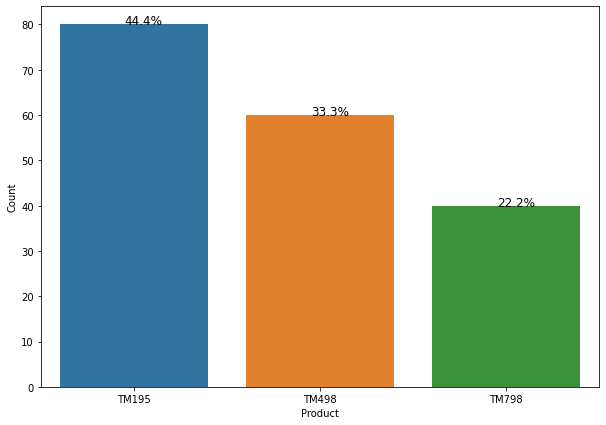

In [29]:
plt.figure(figsize=(10,7))
ax = sns.countplot(df['Product'])
plt.xlabel('Product')
plt.ylabel('Count')
bar_perc(ax,df['Product'])

Observations: In the comparison with the  various product models among the customers, The Product model TM195 is the most popular one among the customers. 
    


#   Numerical Distribution:

In [31]:
df_num = cardiodata.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Age,Education,Usage,Fitness,Income,Miles
0,18,14,3,4,29562,112
1,19,15,2,3,31836,75
2,19,14,4,3,30699,66
3,19,12,3,3,32973,85
4,20,13,4,2,35247,47


# Bivariate Analysis:

# Check for correlation among Numerical Variables using Heatmap:

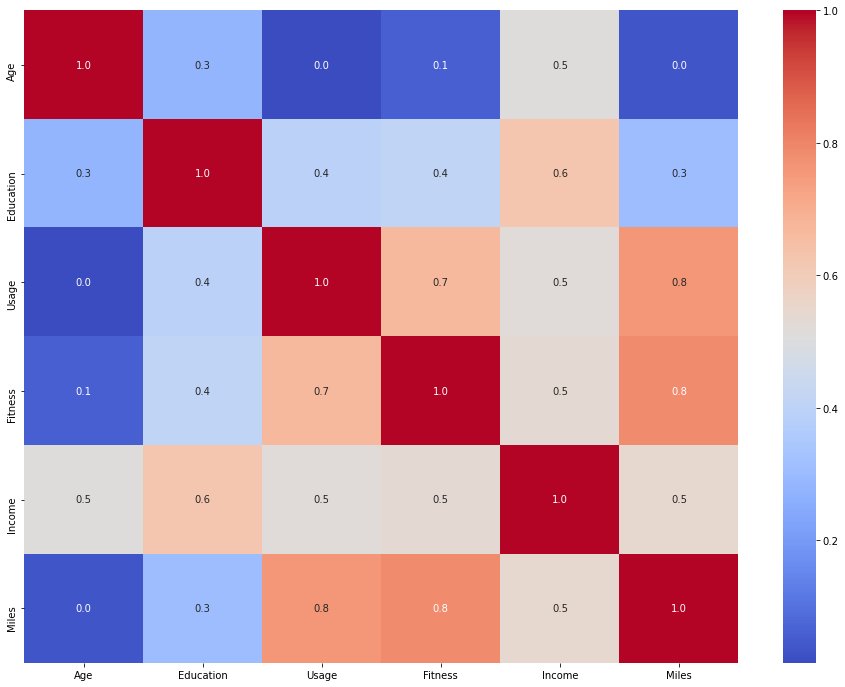

In [32]:
corr = df_num.corr()

# plot the heatmap
plt.figure(figsize=(16,12))
sns.heatmap(corr, annot=True,cmap='coolwarm',
        fmt=".1f",
        xticklabels=corr.columns,
        yticklabels=corr.columns)

# Observations based on the Heatmap:

* Usage is highly correlated with Fitness.

* None of the numerical variables are negatively correlated.

* Miles has high correlation with Usage.
* Age and Miles have no correlation .
* Age and Usage too have no correlation .
* It is important to note that correlation does not imply causation.

# Multivariate Analysis: Gender, Marital Status and Product 

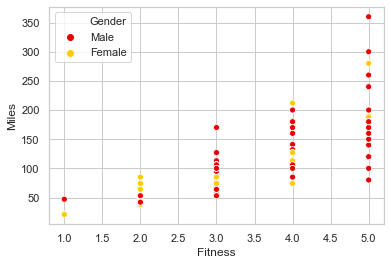

In [35]:
sns.scatterplot(x = "Fitness", y = "Miles", hue='Gender' ,data = cardiodata, palette='hot')
sns.set(style='whitegrid')
plt.show()

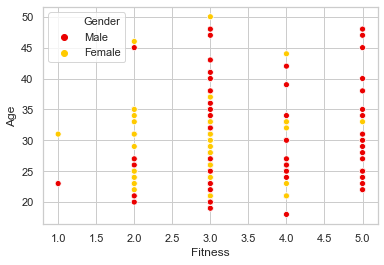

In [36]:
sns.scatterplot(x = "Fitness", y = "Age", hue='Gender' ,data = cardiodata , palette='hot')
sns.set(style='whitegrid')
plt.show()

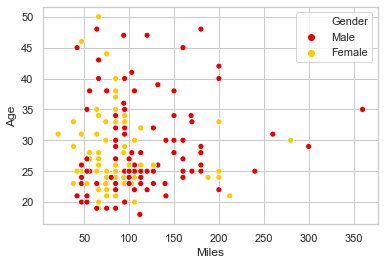

In [37]:
sns.scatterplot(x = "Miles", y = "Age", hue='Gender' ,data = cardiodata, palette='hot' )
sns.set(style='whitegrid')
plt.show()

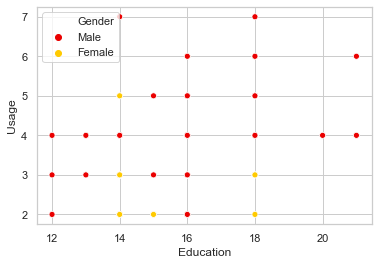

In [38]:
sns.scatterplot(x = "Education", y = "Usage", hue='Gender' ,data = cardiodata, palette='hot' )
sns.set(style='whitegrid')
plt.show()

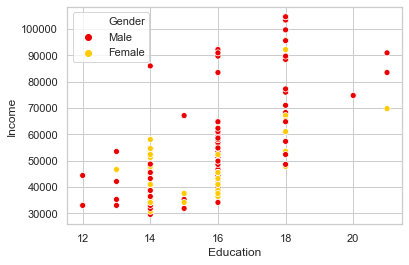

In [39]:
sns.scatterplot(x = "Education", y = "Income", hue='Gender' ,data = cardiodata, palette='hot' )
sns.set(style='whitegrid')
plt.show()

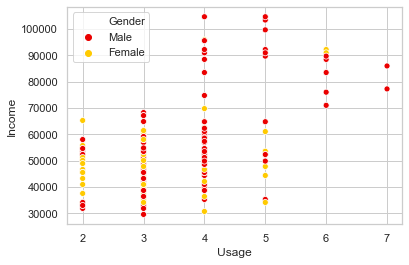

In [41]:
sns.scatterplot(x = "Usage", y = "Income", hue='Gender' ,data = cardiodata, palette='hot' )
sns.set(style='whitegrid')
plt.show()

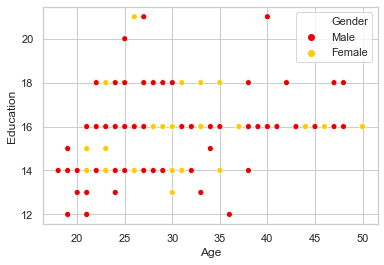

In [42]:
sns.scatterplot(x = "Age", y = "Education", hue='Gender' ,data = cardiodata, palette='hot' )
sns.set(style='whitegrid')
plt.show()

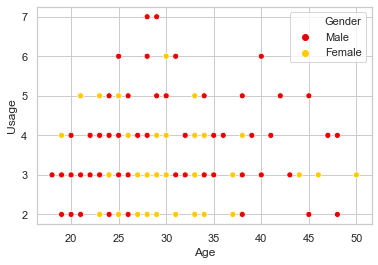

In [43]:
sns.scatterplot(x = "Age", y = "Usage", hue='Gender' ,data = cardiodata, palette='hot' )
sns.set(style='whitegrid')
plt.show()

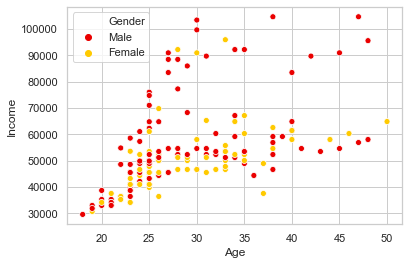

In [44]:
sns.scatterplot(x = "Age", y = "Income", hue='Gender' ,data = cardiodata, palette='hot' )
sns.set(style='whitegrid')
plt.show()

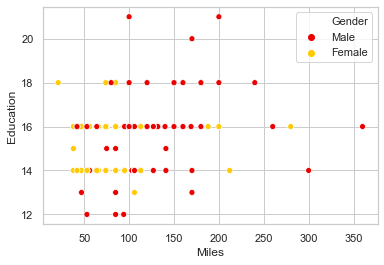

In [45]:
sns.scatterplot(x = "Miles", y = "Education", hue='Gender' ,data = cardiodata, palette='hot' )
sns.set(style='whitegrid')
plt.show()

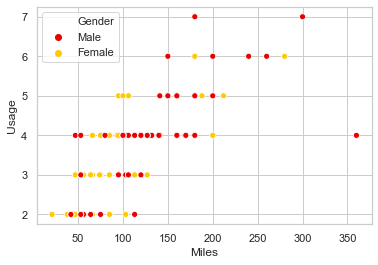

In [46]:
sns.scatterplot(x = "Miles", y = "Usage", hue='Gender' ,data = cardiodata, palette='hot' )
sns.set(style='whitegrid')
plt.show()

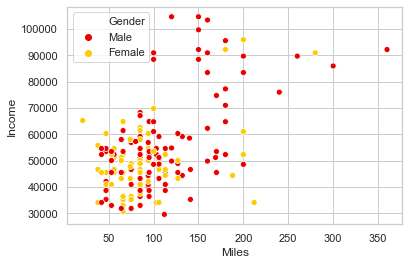

In [47]:
sns.scatterplot(x = "Miles", y = "Income", hue='Gender' ,data = cardiodata, palette='hot' )
sns.set(style='whitegrid')
plt.show()

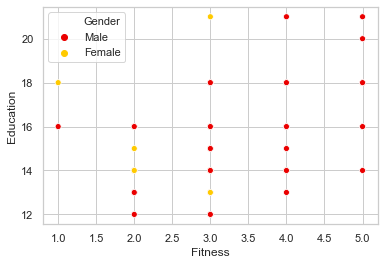

In [48]:
sns.scatterplot(x = "Fitness", y = "Education", hue='Gender' ,data = cardiodata, palette='hot' )
sns.set(style='whitegrid')
plt.show()

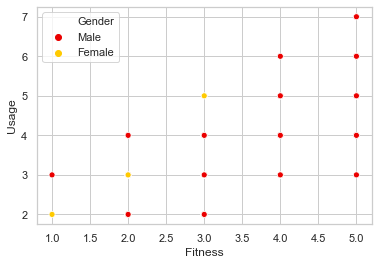

In [49]:
sns.scatterplot(x = "Fitness", y = "Usage", hue='Gender' ,data = cardiodata, palette='hot' )
sns.set(style='whitegrid')
plt.show()

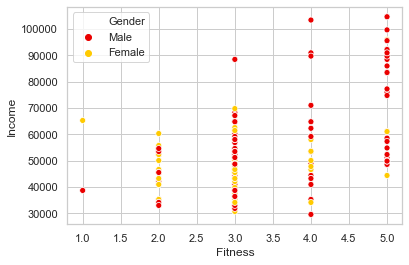

In [50]:
sns.scatterplot(x = "Fitness", y = "Income", hue='Gender' ,data = cardiodata, palette='hot' )
sns.set(style='whitegrid')
plt.show()

# Observations of the Numerical variables with respect to Gender 
* Males are more fitter than Females and so they can run more miles .
* With respect to Age Vs Fitness, Most males stay fitter even they are as aged as  50years old whereas its lesser in females who stay fit as they grow older .
* Therefore, the usage of the treadmill is higher in males than in females.
* In general , most males have an higher income than females and so they afford doing cardio fitness often compared to females.


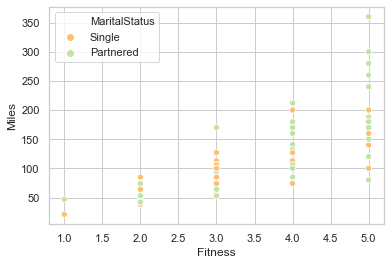

In [51]:
sns.scatterplot(x = "Fitness", y = "Miles", hue='MaritalStatus' ,data = cardiodata, palette='Spectral')
sns.set(style='whitegrid')
plt.show()

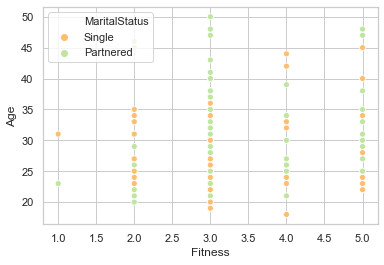

In [52]:
sns.scatterplot(x = "Fitness", y = "Age", hue='MaritalStatus' ,data = cardiodata , palette='Spectral')
sns.set(style='whitegrid')
plt.show()

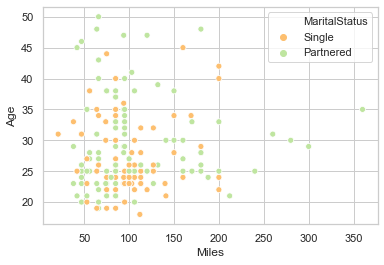

In [53]:
sns.scatterplot(x = "Miles", y = "Age", hue='MaritalStatus' ,data = cardiodata, palette='Spectral' )
sns.set(style='whitegrid')
plt.show()

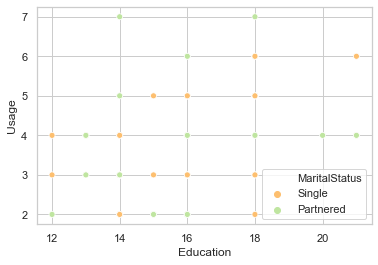

In [55]:
sns.scatterplot(x = "Education", y = "Usage", hue='MaritalStatus' ,data = cardiodata, palette='Spectral' )
sns.set(style='whitegrid')
plt.show()

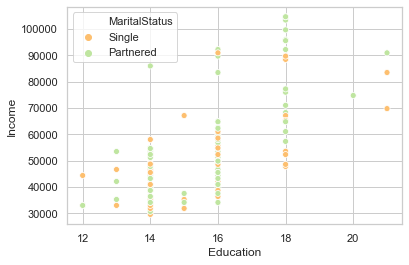

In [54]:
sns.scatterplot(x = "Education", y = "Income", hue='MaritalStatus' ,data = cardiodata, palette='Spectral' )
sns.set(style='whitegrid')
plt.show()

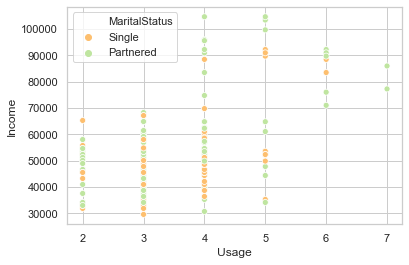

In [56]:
sns.scatterplot(x = "Usage", y = "Income", hue='MaritalStatus' ,data = cardiodata, palette='Spectral' )
sns.set(style='whitegrid')
plt.show()

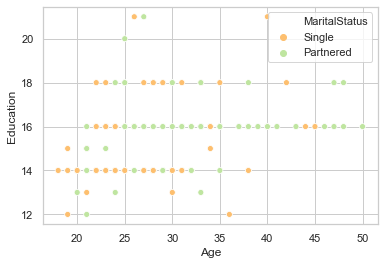

In [57]:
sns.scatterplot(x = "Age", y = "Education", hue='MaritalStatus' ,data = cardiodata, palette='Spectral' )
sns.set(style='whitegrid')
plt.show()

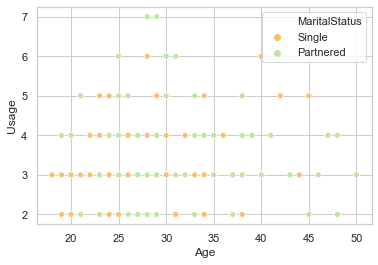

In [58]:
sns.scatterplot(x = "Age", y = "Usage", hue='MaritalStatus' ,data = cardiodata, palette='Spectral' )
sns.set(style='whitegrid')
plt.show()

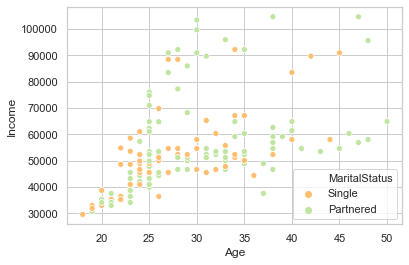

In [59]:
sns.scatterplot(x = "Age", y = "Income", hue='MaritalStatus' ,data = cardiodata, palette='Spectral' )
sns.set(style='whitegrid')
plt.show()

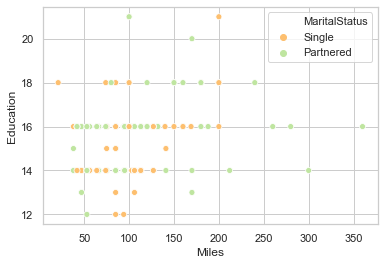

In [60]:
sns.scatterplot(x = "Miles", y = "Education", hue='MaritalStatus' ,data = cardiodata, palette='Spectral' )
sns.set(style='whitegrid')
plt.show()

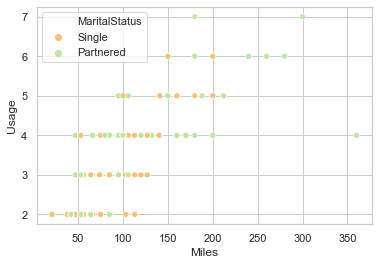

In [61]:
sns.scatterplot(x = "Miles", y = "Usage", hue='MaritalStatus' ,data = cardiodata, palette='Spectral' )
sns.set(style='whitegrid')
plt.show()

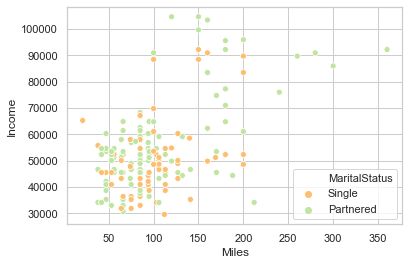

In [62]:
sns.scatterplot(x = "Miles", y = "Income", hue='MaritalStatus' ,data = cardiodata, palette='Spectral' )
sns.set(style='whitegrid')
plt.show()

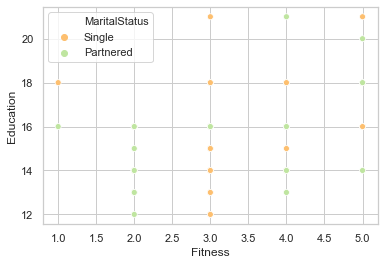

In [63]:
sns.scatterplot(x = "Fitness", y = "Education", hue='MaritalStatus' ,data = cardiodata, palette='Spectral' )
sns.set(style='whitegrid')
plt.show()

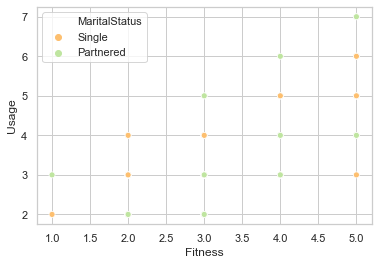

In [64]:
sns.scatterplot(x = "Fitness", y = "Usage", hue='MaritalStatus' ,data = cardiodata, palette='Spectral' )
sns.set(style='whitegrid')
plt.show()

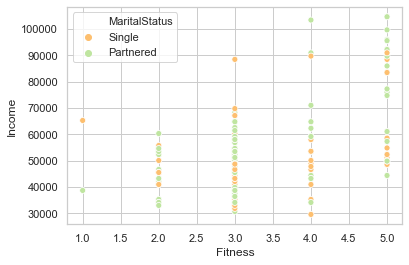

In [65]:
sns.scatterplot(x = "Fitness", y = "Income", hue='MaritalStatus' ,data = cardiodata, palette='Spectral' )
sns.set(style='whitegrid')
plt.show()

#  Observations of the Numerical variables with respect to MaritalStatus 
* Based on the above observations, customers who are partnered prefer to do cardio more rather than customers who are single.
* Moreover , Customers when they are partnered tend to have an higher income , making them affordable to go cardiofitness everyweek.


    

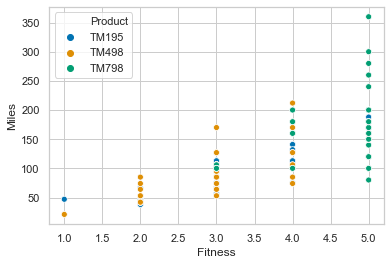

In [69]:
sns.scatterplot(x = "Fitness", y = "Miles", hue='Product' ,data = cardiodata, palette='colorblind')
sns.set(style='whitegrid')
plt.show()

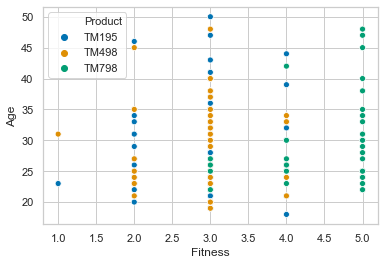

In [70]:
sns.scatterplot(x = "Fitness", y = "Age", hue='Product' ,data = cardiodata , palette='colorblind')
sns.set(style='whitegrid')
plt.show()

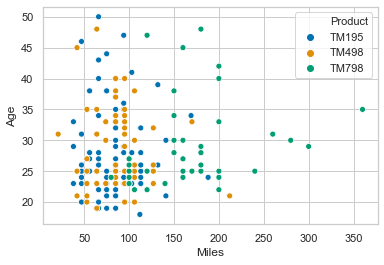

In [71]:
sns.scatterplot(x = "Miles", y = "Age", hue='Product' ,data = cardiodata, palette='colorblind' )
sns.set(style='whitegrid')
plt.show()

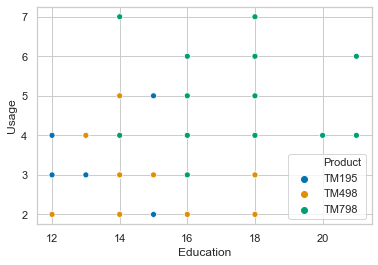

In [72]:
sns.scatterplot(x = "Education", y = "Usage", hue='Product' ,data = cardiodata, palette='colorblind' )
sns.set(style='whitegrid')
plt.show()

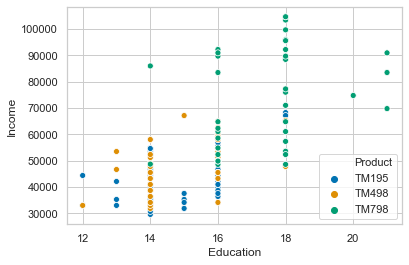

In [73]:
sns.scatterplot(x = "Education", y = "Income", hue='Product' ,data = cardiodata, palette='colorblind' )
sns.set(style='whitegrid')
plt.show()

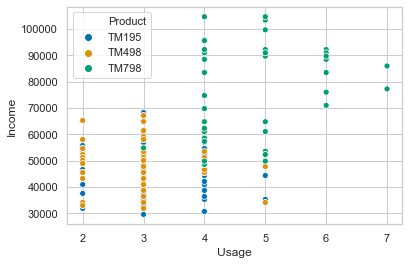

In [79]:
sns.scatterplot(x = "Usage", y = "Income", hue='Product' ,data = cardiodata, palette='colorblind' )
sns.set(style='whitegrid')
plt.show()

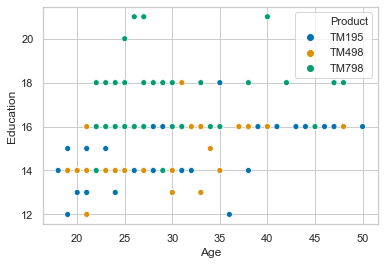

In [80]:
sns.scatterplot(x = "Age", y = "Education", hue='Product' ,data = cardiodata, palette='colorblind' )
sns.set(style='whitegrid')
plt.show()

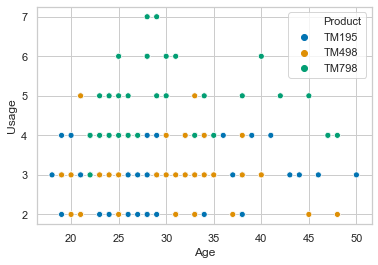

In [81]:
sns.scatterplot(x = "Age", y = "Usage", hue='Product' ,data = cardiodata, palette='colorblind' )
sns.set(style='whitegrid')
plt.show()

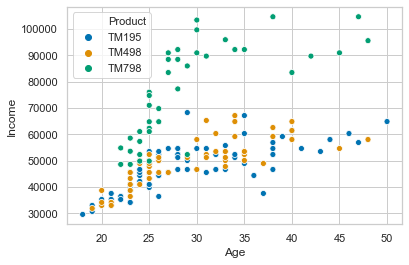

In [82]:
sns.scatterplot(x = "Age", y = "Income", hue='Product' ,data = cardiodata, palette='colorblind' )
sns.set(style='whitegrid')
plt.show()

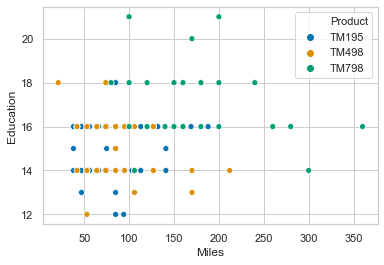

In [83]:
sns.scatterplot(x = "Miles", y = "Education", hue='Product' ,data = cardiodata, palette='colorblind' )
sns.set(style='whitegrid')
plt.show()

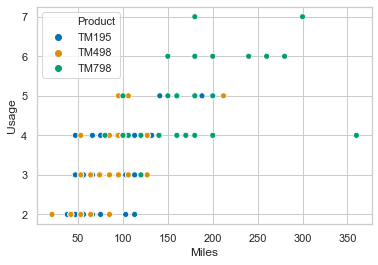

In [84]:
sns.scatterplot(x = "Miles", y = "Usage", hue='Product' ,data = cardiodata, palette='colorblind' )
sns.set(style='whitegrid')
plt.show()

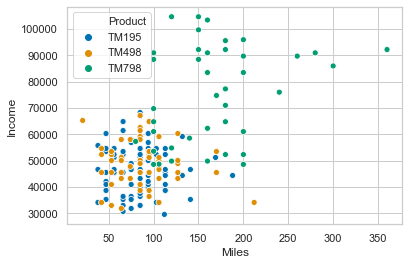

In [85]:
sns.scatterplot(x = "Miles", y = "Income", hue='Product' ,data = cardiodata, palette='colorblind' )
sns.set(style='whitegrid')
plt.show()

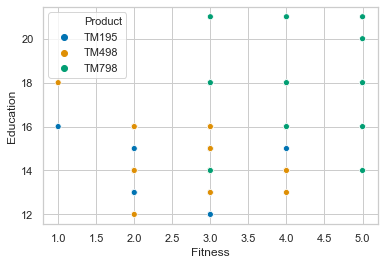

In [78]:
sns.scatterplot(x = "Fitness", y = "Education", hue='Product' ,data = cardiodata, palette='colorblind' )
sns.set(style='whitegrid')
plt.show()

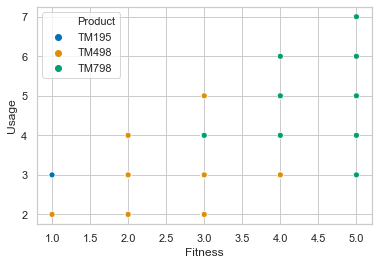

In [77]:
sns.scatterplot(x = "Fitness", y = "Usage", hue='Product' ,data = cardiodata, palette='colorblind' )
sns.set(style='whitegrid')
plt.show()

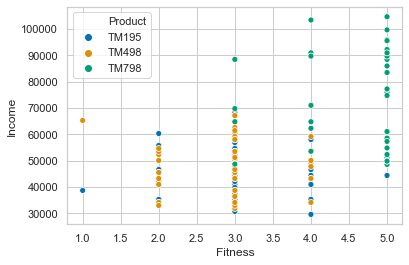

In [74]:
sns.scatterplot(x = "Fitness", y = "Income", hue='Product' ,data = cardiodata, palette='colorblind' )
sns.set(style='whitegrid')
plt.show()

# Observations of the  Numerical variables with respect to Product 
 * It is observed that the TM798 is the most popular treadmill model used by most of the customers . Its popular among the customers who run more miles and are very fit. 
* But on the other scale , this product looks expensive as most customers with high income afford to buy this product rather than customers with low income.

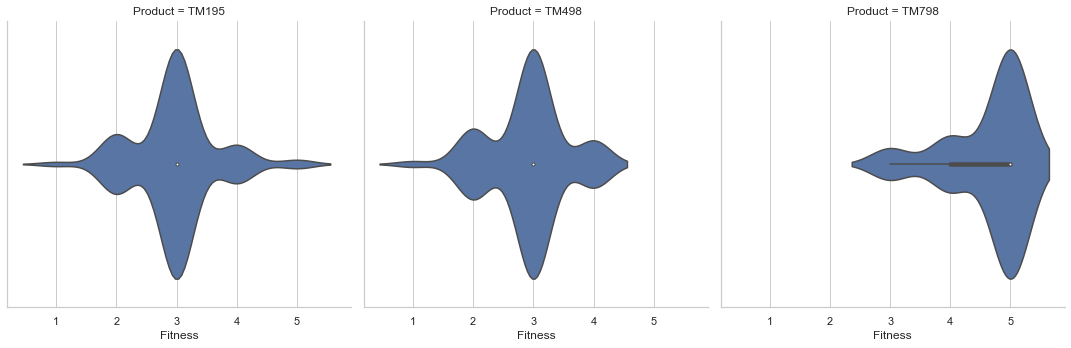

In [89]:
# Dispersion of Product based on Fitness ratings
sns.catplot(x='Fitness',
             col='Product', 
             data=df,
             col_wrap=4,
             kind="violin")

Product models TM798 and TM498 are left skewed whereas Product model TM195 is equally skewed.

# Conclusion:

We analysed a dataset of 180 rows and 9 columns of customer data on purchasing the treadmill products in the cardio fitness store . There are three product models TM195,TM498 and TM798.  The major factors on affecting the purchase of product models are :
* Income
* Miles
* Fitness 
* Gender in terms of the categorical variable.

* The variable Education does not have much impact in the purchase of the treadmill products.

Conclusions drawn: 

* Customers who have an high income goes on purchasing the model TM798 compared to other two models.
* Customers with higher fitness score and running more miles too prefer choosing model TM798 compared with other two models.
* From the above observations, Males prefer doing cardio more than Females as the purchase of the products are more popular among the Males than Females.


# Recommendations:

* Based upon the various observations and insights with the dataset done , we finally can conclude  that majority of the customers are Males or either being partnered. 
* The product model TM798 is less targeted by the customers as its expensive compared to the other two models TM195 and TM498.
* In general, customers with a higher income and well fit, are the common customers in coming to Cardio Good Fitness Store for purchase of the treadmills.
* Their usage is higher and also they cover up more miles.


Further Analysis:
* Try automated data profiling using Pandas Profiling.


In [91]:
!pip install pandas-profiling==2.8.0

In [92]:
from pandas_profiling import ProfileReport
# Use the original dataframe, so that original features are considered
prof = ProfileReport(cardiodata)
# to view report created by pandas profile
prof

In [93]:
prof.to_file('output.html')